In [1]:
import numpy as np
from pathlib import Path
path = Path("../daily-historical-stock-prices-1970-2018/historical_stock_prices_light.csv")

In [2]:
from inference.prepare import StockData

stockData = StockData()

In [3]:
array, tickers, dates = stockData.get_N_stocks(10)
print("Shape of the output array is: {}".format(array.shape))
print("Number of stocks observed is: {}".format(len(tickers)))
print("Number of observations is: {}".format(len(dates)))
print(array[:5])

Shape of the output array is: (12269, 10)
Number of stocks observed is: 10
Number of observations is: 12269
[[30.125       0.92592591  3.54166675  9.4375     18.22500038  9.15310669
   1.25        0.85677081  1.234375    1.9296875 ]
 [30.625       1.00823045  3.45833325  9.5625     18.29999924  9.58456612
   1.21875     0.85416669  1.2578125   1.9375    ]
 [31.          1.02469134  3.44791675  9.46875    18.41250038  9.76947689
   1.18923616  0.84375     1.25390625  1.96875   ]
 [30.75        1.02880657  3.33333325  9.4375     18.42499924  9.64620304
   1.21180558  0.8515625   1.25        1.96484375]
 [30.75        1.03292179  3.26041675  9.3125     18.4375      9.49211025
   1.20659721  0.85677081  1.234375    1.953125  ]]


In [4]:
from inference.sample import StockSampler

m=4

sampler = StockSampler(array, tickers, dates, m=m)

In [5]:
sampler.x

array([[ 30.125     ,   0.92592591,   3.54166675, ...,   0.85677081,
          1.234375  ,   1.9296875 ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 71.27999878, 348.76998901, 137.82000732, ...,  45.65000153,
        132.61000061,  79.51999664]])

In [6]:
sampler.sample(100)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:10<00:00,  1.31s/it]


In [7]:
from inference.analyse import StockAnalysis

params = {"theta": sampler.theta, "b2":sampler.b2}

analyser = StockAnalysis(sampler.prices_array, sampler.etas + sampler.Rs,
                        sampler.tickers, params, dates=sampler.dates, m=m)

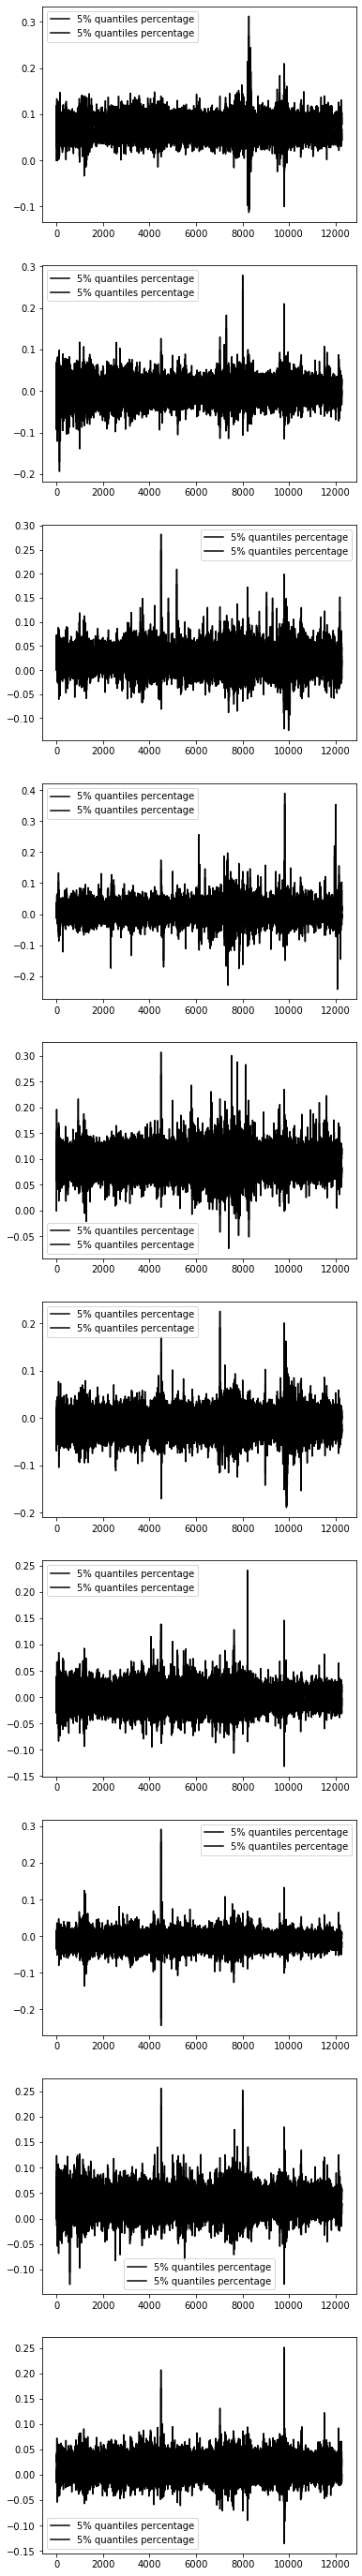

In [8]:
analyser.plot_quantiles_percentage()

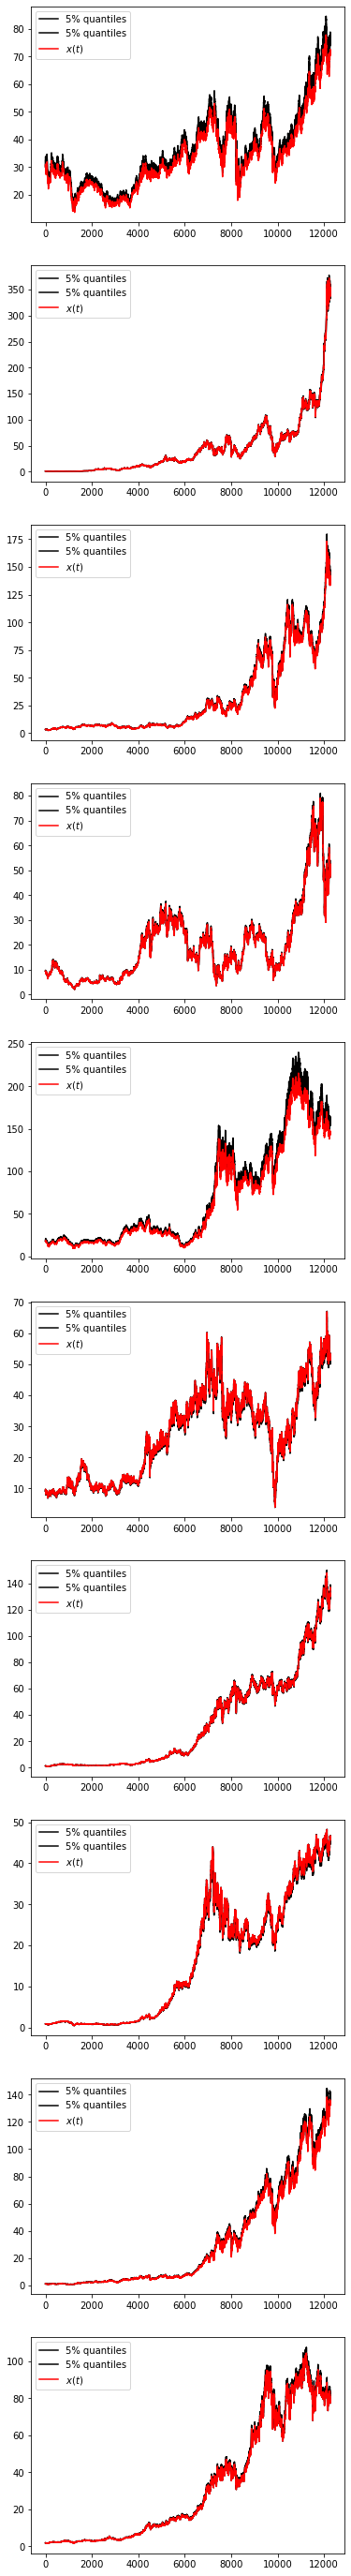

In [9]:
analyser.plot_quantiles()

In [10]:
index_list = [1,2,3,5,6,7,8,9]
observed_tickers = [sampler.tickers[i] for i in index_list]

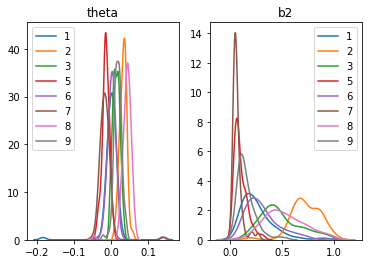

In [11]:
analyser.plot_parameter_distributions(observed_tickers)

In [12]:
sampler.tickers

['AEP', 'BA', 'CAT', 'FL', 'IBM', 'IP', 'JNJ', 'KO', 'UTX', 'XOM']

In [13]:
sampler.b2

array([[0.26425874, 0.29657444, 0.19509184, 0.14423825, 0.58666412,
        0.3254507 , 0.2101939 , 0.21650899, 0.0946918 , 0.13585815],
       [0.26425874, 0.21284601, 0.19509184, 0.32615442, 0.58666412,
        0.07326678, 0.61432841, 0.04983176, 0.36735386, 0.27766235],
       [0.26425874, 0.24701923, 0.7235476 , 0.40799676, 0.58666412,
        0.19383546, 0.62299452, 0.02600721, 0.39864015, 0.18267363],
       [0.26425874, 0.09620283, 0.7235476 , 0.48476157, 0.58666412,
        0.07813761, 0.29456292, 0.0556348 , 0.39864015, 0.09251612],
       [0.26425874, 0.32212631, 0.7235476 , 0.29149335, 0.58666412,
        0.07258003, 0.19135455, 0.05432146, 0.38544295, 0.1072963 ],
       [0.26425874, 0.1371124 , 0.66854122, 0.29149335, 0.58666412,
        0.14255205, 0.21501494, 0.06409461, 0.46435885, 0.1016622 ],
       [0.26425874, 0.26664975, 0.66854122, 0.44698706, 0.58666412,
        0.03332982, 0.14904554, 0.11351183, 0.46435885, 0.25100883],
       [0.26425874, 0.52654521, 0.6685412

In [21]:
analyser.x.shape

(100, 12269, 10)

In [26]:
percentiles = np.percentile(analyser.x[:, :, 0], [2.5, 97.5], axis=0)
percentiles.shape

(2, 12269)

In [27]:
print(percentiles[0] - percentiles[1])

[ 0.         -1.0479519  -1.06534529 ... -2.49873483 -2.49769127
 -2.45942559]
